## ASSIGNMENT 2: Titanic Missing Values

Name: Camille Chauliac
Section: O-2

**Perform an exploratory analysis of the Titanic dataset and implement a strategy to impute missing values.**

## Part I: Exploratory analysis

For this, we should frist upload and import the necessary libraries

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Following this, the dataset should be correctly uploaded and read with the use of **Pandas**

An appropriate column as index should be noted. As each Passenger has an unique PassengerId, this will be the chosen index column.

In [116]:
titanic = pd.read_csv("/Users/camillechauliac/Documents/IE - Big data & Business Analytics/TERM 2/PYTHON/train.csv")

titanic = titanic.set_index("PassengerId")

titanic.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


To analyze the dataset correctly, it is useful to understand which data we're dealing with

In [117]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Question 1:** Compute the percentage of survivors out of total number of passengers

In [119]:
#Compute the percentage of survivors
perc_survivors = 100 * sum(titanic["Survived"] == 1) / len(titanic)
print("Total percentage of survivors of the titanic:", perc_survivors)

Total percentage of survivors of the titanic: 38.3838383838


**Question 2:** Compute the percentage of men and women out of total number of passengers

In [120]:
# Compute the percentage of men and women
perc_men = 100 * sum(titanic["Sex"] == "male") / len(titanic)
perc_women = 100 - perc_men

print("Percentage of men on the titanic:", perc_men, ", and women:", perc_women)

Percentage of men on the titanic: 64.758698092 , and women: 35.241301908


**Question 3:** Compute the percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived)

In [227]:
# a first look at the values to have an overview
pd.crosstab([titanic.Sex],titanic.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [216]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


A second attempt, to see if I get the same results. 'A check-up'

In [235]:
def calc_prob_sex_surv(sex, pclass):
    count_sex_surv = sum(titanic["Sex"] == sex) & (titanic["Survived"] == surv)
    prob_sex_surv = count_sex_surv / len(titanic)
    
    return prob_sex_surv
    
for i_sex in titanic["Sex"].unique():
        count_sex_class = sum(
            (titanic["Sex"] == i_sex))
        
        count_sex_class_surv = sum(
            (titanic["Sex"] == i_sex)
            & (titanic["Survived"] == 1)
        )
        
        prob_sex_class_surv = count_sex_class_surv / count_sex_class
        
        print(
            "The probability of survival when :", i_sex,
            "is = ", 
            prob_sex_class_surv,
        )

The probability of survival when : male is =  0.188908145581
The probability of survival when : female is =  0.742038216561


**Question 4:** Compute the percentage of survivors that were men and women

In [241]:
survived_by_total = (
    (titanic.groupby)(["Survived", "Sex"]).count()["Name"][1]
    / (titanic.groupby)(["Survived", "Sex"]).count()["Name"].groupby("Survived").sum()[1]
    *100
)
survived_by_total

Sex
female    68.128655
male      31.871345
Name: Name, dtype: float64

**Question 5:** Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving

In [269]:
df_prob = (
    (titanic.groupby)(["Sex","Survived"]).count()["Name"]
    / (titanic.groupby)(["Sex","Survived"]).count()["Name"].sum()
    * 100
)
df_prob.unstack()

Survived,0,1
Sex,,
female,9.090909,26.150393
male,52.525253,12.233446


In [270]:
Df_prob = pd.crosstab(titanic.Survived, titanic.Sex, margins=True, normalize=True)

In [271]:
Df_prob

Sex,female,male,All
Survived,,,
0,0.090909,0.525253,0.616162
1,0.261504,0.122334,0.383838
All,0.352413,0.647587,1.000000


**Question 6:** Display in a DataFrame the probability of survival/not survival of all combinations of sex and class

In [228]:
# First get more information
pd.crosstab([titanic.Sex,titanic.Survived],titanic.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [239]:
# create a function to calculate the probabilities
def calc_prob_sex_surv(sex, pclass):
    count_sex_surv = sum(titanic["Sex"] == sex) & (titanic["Survived"] == surv)
    prob_sex_surv = count_sex_surv / len(titanic)
    
    return prob_sex_surv
    
for i_sex in titanic["Sex"].unique():
    for j_class in titanic["Pclass"].unique():
        count_sex_class = sum(
            (titanic["Sex"] == i_sex) & (titanic["Pclass"] == j_class))
        
        count_sex_class_surv = sum(
            (titanic["Sex"] == i_sex)
            & (titanic["Pclass"] == j_class)
            & (titanic["Survived"] == 1)
        )
        
        prob_sex_class_surv = count_sex_class_surv / count_sex_class
        
        print(
            "The probability of survival when :", i_sex,
            " and class :", j_class,
            "is = ", 
            prob_sex_class_surv,
        )

The probability of survival when : male  and class : 3 is =  0.135446685879
The probability of survival when : male  and class : 1 is =  0.368852459016
The probability of survival when : male  and class : 2 is =  0.157407407407
The probability of survival when : female  and class : 3 is =  0.5
The probability of survival when : female  and class : 1 is =  0.968085106383
The probability of survival when : female  and class : 2 is =  0.921052631579


This is a second try, as a back-up and control function, to see if I get the same results

In [261]:
def survival_rate(pclass, sex):
    """
    Args:
        pclass: class value 1,2 or 3
        sex: male or female
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = titanic.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    grouped_by_survived_sex = \
        titanic.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)

    return survived_sex_pct

In [262]:
# Get the actual numbers grouped by class, suvival and sex
groupedby_class_survived_size = titanic.groupby(['Pclass','Survived','Sex']).size()

In [263]:
groupedby_class_survived_size.unstack()

Sex              female  male
Pclass Survived              
1      0              3    77
       1             91    45
2      0              6    91
       1             70    17
3      0             72   300
       1             72    47

In [265]:
# Print - Grouped by class, survival and sex
print (groupedby_class_survived_size)
print ('Class 1 - female survival rate: {}%'.format(survival_rate(1,'female')))
print ('Class 1 - male survival rate: {}%'.format(survival_rate(1,'male')))
print ('-----')
print ('Class 2 - female survival rate: {}%'.format(survival_rate(2,'female')))
print ('Class 2 - male survival rate: {}%'.format(survival_rate(2,'male')))
print ('-----')
print ('Class 3 - female survival rate: {}%'.format(survival_rate(3,'female')))
print ('Class 3 - male survival rate: {}%'.format(survival_rate(3,'male')))

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64
Class 1 - female survival rate: 96.81%
Class 1 - male survival rate: 36.89%
-----
Class 2 - female survival rate: 92.11%
Class 2 - male survival rate: 15.74%
-----
Class 3 - female survival rate: 50.0%
Class 3 - male survival rate: 13.54%


** Same goes for the non survival rate, just have to adjust the value for survival in the definition function.**

I think I get the right values, but unfortunately I did not find a way to put them in a Dataframe.

## Part II: Imputing missing values

**Devise some strategy to impute the missing values in the Age column.**

**AGE**

So, we have to fill the NAN values of Age column. 

The chosen tactic is to fill the NAN Values of AGE using the Title of the Name. 
The passengers all have a title in their name which should first be extracted for further calculations.

**STEP 1:**
Getting more info about the Age column, to see how many NAN values it contains

In [76]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**STEP 2:**
See all the unique ages and finding the missing values

In [94]:
titanic['Age'].unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [95]:
nan_num = titanic['Age'].isnull().sum()
nan_num

177

In [78]:
titanic.title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
the Countess      1
Lady              1
Ms                1
Jonkheer          1
Capt              1
Mme               1
Sir               1
Don               1
Name: title, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

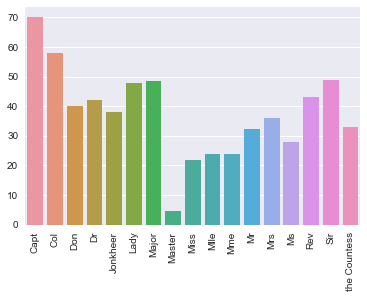

In [79]:
using = dict(titanic.groupby("title").mean()["Age"])
sns.barplot(x = list(using.keys()), y = list(using.values()))
plt.xticks(rotation = 90)

From the plot it is clear that different passengers have a different age based on their original title. 
Therefore, the assumption is made of filling Nan values based on the title.

In [107]:
# create a new feature to extract title names from the Name column
titanic['Title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [114]:
titanic['Title'].head()

PassengerId
1      Mr
2     Mrs
3    Miss
4     Mrs
5      Mr
Name: Title, dtype: object

In [110]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

# map the normalized titles to the current titles 
titanic.Title = titanic.Title.map(normalized_titles)

# view value counts for the normalized titles
print(titanic.Title.value_counts())

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64


**STEP 3:** Update the NAN values in Age column according to the titles

In [111]:
# group by Sex, Pclass, and Title
grouped = titanic.groupby(['Sex','Pclass', 'Title'])

# view the median Age by the grouped features
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64

In [112]:
# apply the grouped median value on the Age NaN
titanic.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

# view changes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 130.5+ KB


In [113]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
